<a href="https://colab.research.google.com/github/JamesPSlater/Analysis-ML-Project/blob/main/Choosing_the_right_estimator_Enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [27]:
# read data and .head()
# ASSUME- data.csv from BCA (cancer analysis)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://media.githubusercontent.com/media/JamesPSlater/Analysis-ML-Project/main/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Q. Define the problem domain

In [3]:

# Diagnosing what is a fraud payment "isFraud"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Q. Identify candidate questions for your machine learning project

In [32]:
# value_counts
# discrete or continuous numbers
# what is label, what columns should be evaluated to become 
# features, Dimensions, Variables
# 
# can i use the dataset as-is or does it need cleaning?
# dfs = df.sample(n= 10000, random_state = 0)
df = pd.DataFrame({'col':np.random.randn(12000), 'isFraud':np.random.randint(low = 0, high = 2, size=12000)})
dfs = df.groupby('isFraud').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)
dfs['isFraud'].value_counts()
dfs

,col,isFraud
0,-0.681372,0
1,0.663179,0
2,0.061078,0
3,0.043846,0
4,0.637038,0
...,...,...
9995,0.628466,1
9996,-0.159988,1
9997,0.763160,1
9998,-0.536477,1


In [29]:
dfs['step'].value_counts().sum()

KeyError: ignored

In [7]:
dfs['nameDest'].value_counts().sum()

10000

In [22]:
dfs['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### Q. Generate a descriptive statistics report for the columns in your dataset

In [9]:
# data.describe().T
dfs.describe().T

,count,mean,std,min,25%,50%,75%,max
step,10000.0,2.439752e+02,1.406005e+02,1.00,156.0000,250.000,3.397500e+02,7.220000e+02
amount,10000.0,1.769220e+05,6.056647e+05,0.24,13087.4875,74707.720,2.128032e+05,3.239349e+07
oldbalanceOrg,10000.0,8.094452e+05,2.844372e+06,0.00,0.0000,14208.400,1.051312e+05,3.160261e+07
newbalanceOrig,10000.0,8.290581e+05,2.880966e+06,0.00,0.0000,0.000,1.391278e+05,3.178577e+07
oldbalanceDest,10000.0,1.074660e+06,2.790955e+06,0.00,0.0000,128164.180,9.539295e+05,7.536342e+07
newbalanceDest,10000.0,1.192707e+06,3.084344e+06,0.00,0.0000,218813.905,1.128766e+06,1.062124e+08
isFraud,10000.0,1.700000e-03,4.119805e-02,0.00,0.0000,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,10000.0,0.000000e+00,0.000000e+00,0.00,0.0000,0.000,0.000000e+00,0.000000e+00


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [10]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4644207 to 3422619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 937.5+ KB


In [11]:
dfs.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4644207,330,CASH_IN,607193.64,C104196924,15458649.28,16065842.92,C2020875465,3394537.70,2787344.06,0,0
3800666,281,PAYMENT,3473.75,C1283140808,0.00,0.00,M2044695613,0.00,0.00,0,0
4426240,322,CASH_OUT,66170.69,C1376666142,32803.00,0.00,C52514926,0.00,66170.69,0,0
5788765,401,TRANSFER,335384.26,C2136161445,197.00,0.00,C2094766437,5311958.61,5647342.87,0,0
2010701,180,CASH_IN,234392.25,C801137003,20882.00,255274.25,C1255594470,0.00,0.00,0,0


In [12]:
dfs.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1941919,177,CASH_OUT,159754.23,C983744166,0.00,0.00,C1694398562,937363.30,1097117.53,0,0
935560,43,PAYMENT,18283.29,C1130747918,0.00,0.00,M439818085,0.00,0.00,0,0
2737417,212,PAYMENT,16030.67,C983345265,23789.00,7758.33,M1766102285,0.00,0.00,0,0
1533109,154,CASH_IN,18697.80,C230180272,3415402.35,3434100.15,C1392694416,1590947.73,1572249.93,0,0
3422619,256,PAYMENT,24126.33,C3773574,0.00,0.00,M1540452933,0.00,0.00,0,0


Q. Is there any correlation in the data? How would you decide which columns to keep?

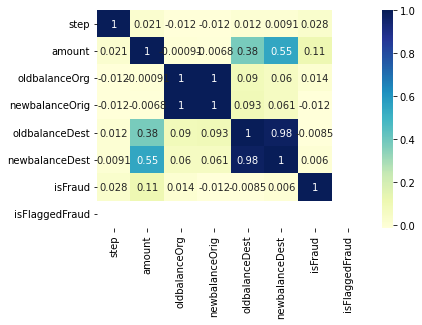

In [13]:
# SEABORN and data.corr() to plot a heatmap
# Github-> DFE6
dataplot = sns.heatmap(dfs.corr(), cmap="YlGnBu", annot=True)

In [14]:
dfc = dfs.drop(['isFlaggedFraud','step','nameOrig','nameDest'], axis = 1)



In [17]:
dfc.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4644207,CASH_IN,607193.64,15458649.28,16065842.92,3394537.70,2787344.06,0
3800666,PAYMENT,3473.75,0.00,0.00,0.00,0.00,0
4426240,CASH_OUT,66170.69,32803.00,0.00,0.00,66170.69,0
5788765,TRANSFER,335384.26,197.00,0.00,5311958.61,5647342.87,0
2010701,CASH_IN,234392.25,20882.00,255274.25,0.00,0.00,0


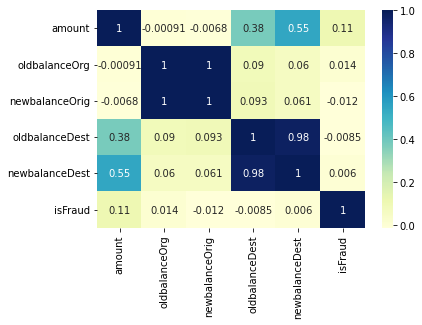

In [18]:
dataplot2 = sns.heatmap(dfc.corr(), cmap="YlGnBu", annot=True)

Q. Is there any imbalance in the label
?

In [ ]:
# LABEL COLUMN-> Y/value you want to predict
# diagnosis column from bca
# Cat = 100, Parrot= 50, Ant= 5
# either no action action required or just del extra rows!

# if one class is less than quarter of the other class,
# the data is imbalanced!
#
# Regression- NO ACTION REQUIRED. 
# Classification (LABEL/Y) - Diagnosis
# 1) Del some of the rows of the larger dataset 
# 2) OR generate FAKE/SIMULATED data 
# 3) Ignore if you want to take a leap of faith in the model

Prediction column a bool

In [20]:
dfc['isFraud'].value_counts()

0    9983
1      17
Name: isFraud, dtype: int64

Q. Are there any outliers in the dataset? What do you do with them?

In [ ]:
# OPTIONAL
# Z-Score
# check for values >3 and <-3
# What do i do with them?
# 1) Remove them 
# 2) replace all >3 with max, <-3 with min
# 3) Ignore

# Detecting Frauds, Anomalies 

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [ ]:
# if you are not sure, do label ENCODING
# unique_values = data['diagnosis'].value_counts()
# Form a dictionary of the unique values!
# encoding_funk = lambda x : dictionary[x]
# data['my_string_column'] = data['my_string_column'].apply(encoding_funk)

In [ ]:
# One hot encoding-> pandas-> get_dummies 

# data['diagnosis'] - get_dummies


# if there are too many values-> one-hot encoding is NOT an option

# GROUP_BY on ZIP_code or country or state!
# or del that column altogether!

# One Hot encoding

# Sales City Profit
#  100.  London  20
#. 100.  Papua.  60
#  123.  London. 21
#. 65.   Paris.  13
#. 92.   Bandar Seri Begawan 22

# 2 kinds of ML problems- 
# 1) i can use city as a filter and generate multiple models
# one for each city

# 2) Or make a model that is GENERALIZED for each city and impacted
# equally by each city

# result of one hot encoding
# Sales City_London City_Papua City_Paris City_BSB Profit
#  100.  1            0         0          0          20
#. 100.  0            1         0           0      .  60
#  123.  1.            0         0          0         21
#. 65.   0             0         1          0      .  13
#. 92.   0            0          0          1         22




# final ml equation
# profit -> label
# features-> [ 'Sales', 'Cit....']
# profit=w1*Sales+w2*C_Lon+w3*C_Pap+w4*C_Par+w5*City_BSB + bias

# Sales from london
# 20=w1*100 + w2*1+ w3*0+ w4*0+ w5*0 + bias
# 21=w1*123 + w2*1+ w3*0+ w4*0+ w5*0 + bias

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [ ]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest = train_test_split(x, y,
#                             test_size=0.2, random_state=42)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
# for loop b/w all your models

# xtrain,xtest, ytrain,ytest = train_test_split

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
# EXPORT your model and upload to azure
# deploy to Azure Container Instance
# after 20-30 mins, consume tab will appear in your ENDPOINT
# and then paste the PYTHON code below!